<a href="https://colab.research.google.com/github/tanvirrahmanaz/Phitron/blob/main/Copy_of_AI_ML_Assignment_3_Module_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [ ]:
# Install required library
!pip install -q kagglehub

# Imports
import kagglehub
import os
import pandas as pd

# -------------------------------
# Download Insurance Dataset
# -------------------------------
insurance_path = kagglehub.dataset_download("mirichoi0218/insurance")
!cp {insurance_path}/insurance.csv /content/insurance.csv

# -------------------------------
# Download Loan Approval Dataset
# -------------------------------
loan_path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")
!cp {loan_path}/loan_data.csv /content/loan_data.csv

# -------------------------------
# Verify Files
# -------------------------------
print("Files in /content:", os.listdir("/content"))

# -------------------------------
# Load CSVs
# -------------------------------
insurance_df = pd.read_csv("/content/insurance.csv")
loan_df = pd.read_csv("/content/loan_data.csv")



100%|██████████| 16.0k/16.0k [00:00<00:00, 20.9MB/s]

Extracting files...


100%|██████████| 751k/751k [00:00<00:00, 862kB/s]

Extracting files...


Files in /content: ['.config', 'loan_data.csv', 'insurance.csv', 'sample_data']


In [ ]:
# TODO: Import all necessary libraries here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessign and model selction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,LabelEncoder

#regression models(part A)
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

#classification models(part B)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#evaluation metrics
from sklearn.metrics import(
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,

)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.

## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [ ]:
# TODO: Load regression dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Explanation:

age: The age of the primary beneficiary (Numeric).

sex: Gender of the insurance contractor (Categorical: female, male).

bmi: Body Mass Index, a measure of body fat based on height and weight (Numeric).

children: Number of children covered by health insurance or number of dependents (Numeric/Discrete).

smoker: Indicates if the beneficiary smokes tobacco (Categorical: yes, no). Note: This is usually a strong predictor for health costs.

region: The beneficiary's residential area in the US (Categorical: northeast, southeast, southwest, northwest).

charges: Individual medical costs billed by health insurance. This is our Target Variable for the regression task.

## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


Descriptive Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
--------------------------------------------------


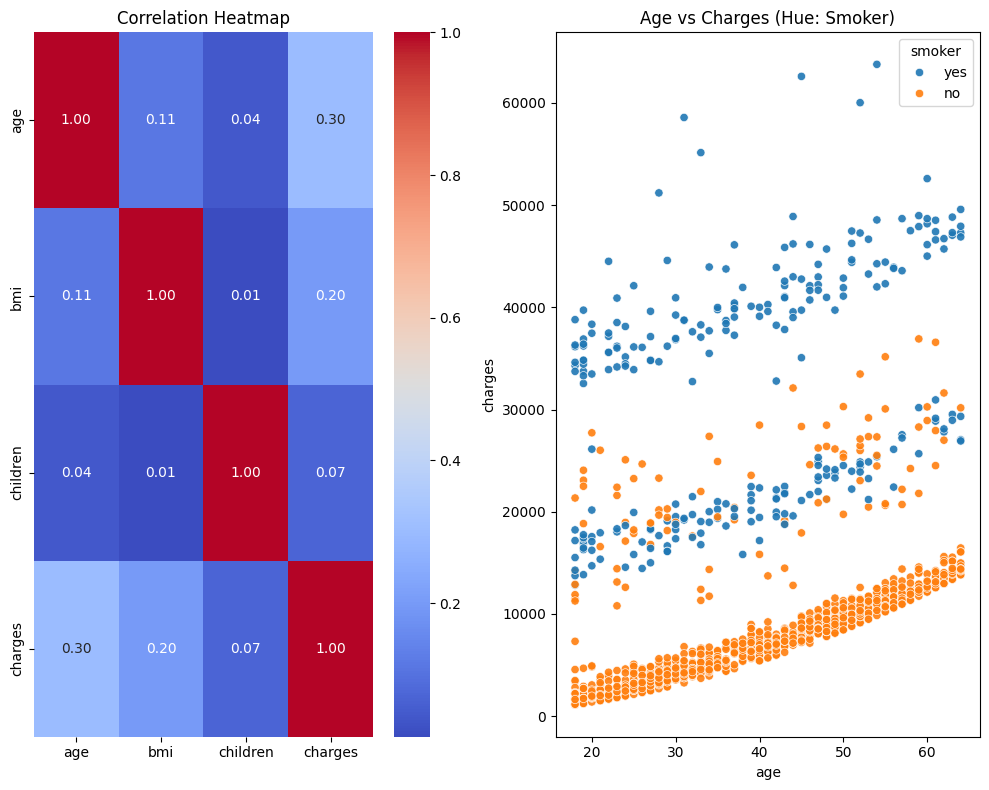


Interpretation:
1. Stats: The average age is ~39 years, and charges vary significantly (std dev is high).
2. Heatmap: Among numerical features, 'age' has the strongest positive correlation with 'charges' (0.30).
3. Plot: There is a clear trend where charges increase as age increases. 
   Crucially, smokers (orange dots) pay significantly higher charges than non-smokers for the same age.


In [ ]:
# TODO: Perform EDA

print("Descriptive Statistics:")
print(df.describe())
print("-" *50)

plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=.9)
plt.title("Age vs Charges (Hue: Smoker)")

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("1. Stats: The average age is ~39 years, and charges vary significantly (std dev is high).")
print("2. Heatmap: Among numerical features, 'age' has the strongest positive correlation with 'charges' (0.30).")
print("3. Plot: There is a clear trend where charges increase as age increases. \n   Crucially, smokers (orange dots) pay significantly higher charges than non-smokers for the same age.")

## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [ ]:
# TODO: Prepare features

X = df.drop('charges', axis=1)
y = df['charges']

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training Data Shape:", X_train_scaled.shape)
print("Testing Data Shape:", X_test_scaled.shape)




Training Data Shape: (1070, 8)
Testing Data Shape: (268, 8)


Explanation of Feature Preparation:
1. Encoding: Categorical variables (sex, smoker, region) were converted into numerical format using One-Hot Encoding (get_dummies) because regression models require numerical input. 'drop_first=True' was used to prevent multicollinearity.

2. Train-Test Split: The data was split into 80% training and 20% testing sets. This ensures we have a separate dataset to evaluate how well the model generalizes to unseen data.

3. Scaling: StandardScaler was applied to normalize features (mean=0, std=1). This is crucial for models which are sensitive to the scale of input features, ensuring that features with larger values (like expenses) don't dominate the distance calculations.

## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [ ]:
# TODO: Multiple Linear Regression

# 1. Initialize and Train the Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 2. Make Predictions on Test Data
y_pred_lr = lr_model.predict(X_test_scaled)

# 3. Evaluate the Model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# 4. Print Metrics
print("Multiple Linear Regression Performance:")
print(f"MAE (Mean Absolute Error): {mae_lr:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")

Multiple Linear Regression Performance:
MAE (Mean Absolute Error): 4181.19
RMSE (Root Mean Squared Error): 5796.28
R² Score: 0.7836


## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [ ]:
# TODO: Polynomial Regression

## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [ ]:
# TODO: Support Vector Regression

## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [ ]:
# TODO: Random Forest Regressor

# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [ ]:
# TODO: Load classification dataset

## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


In [ ]:
# TODO: Classification EDA

## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [ ]:
# TODO: Prepare classification features

## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


In [ ]:
# TODO: Logistic Regression

## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


In [ ]:
# TODO: SVM Classification

## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



In [ ]:
# TODO: Naive Bayes

## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


In [ ]:
# TODO: KNN

## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


In [ ]:
# TODO: Random Forest Classifier

# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## TODO: Write your reflection here